In [16]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [17]:
hybrid = Table.read_table('hybrid.csv')
hybrid

vehicle,year,msrp,acceleration,mpg,class
Prius (1st Gen),1997,24509.7,7.46,41.26,Compact
Tino,2000,35355,8.2,54.1,Compact
Prius (2nd Gen),2000,26832.2,7.97,45.23,Compact
Insight,2000,18936.4,9.52,53,Two Seater
Civic (1st Gen),2001,25833.4,7.04,47.04,Compact
Insight,2001,19036.7,9.52,53,Two Seater
Insight,2002,19137,9.71,53,Two Seater
Alphard,2003,38084.8,8.33,40.46,Minivan
Insight,2003,19137,9.52,53,Two Seater
Civic,2003,14071.9,8.62,41,Compact


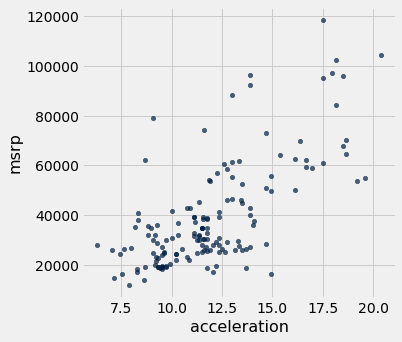

In [18]:
hybrid.scatter('acceleration','msrp')
# is this linear? hard to tell

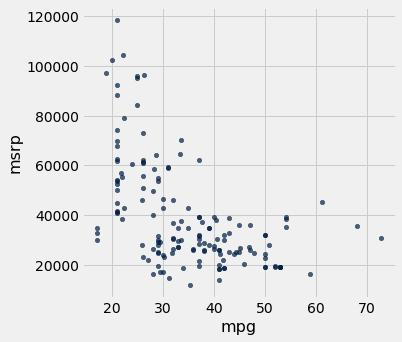

In [19]:
hybrid.scatter('mpg','msrp')
# do you think it will be positive or negative?
# wtf is wrong with us!

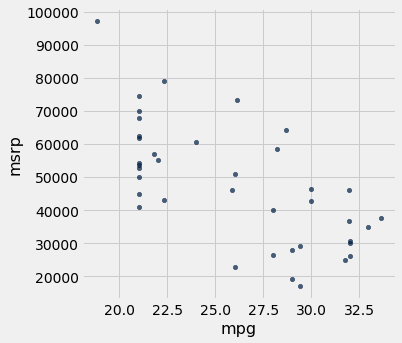

In [20]:
suv = hybrid.where('class','SUV')
suv.scatter('mpg','msrp') 
# all the SUVs are not super fuel efficient, but their prices are high


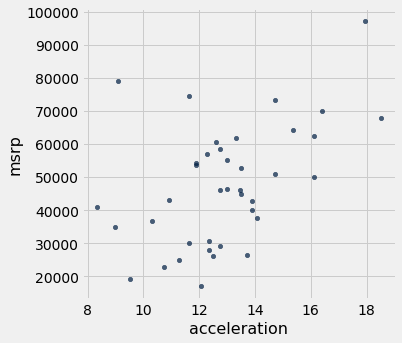

In [21]:
# this looks kind of linear
# is acceleration?

suv.scatter('acceleration','msrp')
# kind of, with some random outliers
# still hard to say without numerical quantities

In [22]:
# how do we compare dollars vs mpg?
# convert to standard units

mean = np.mean(suv.column('msrp'))
std = np.std(suv.column('msrp'))
mean, std

(47624.23435897436, 17981.965417645933)

In [23]:
(suv.column('msrp') - mean) / std

array([-0.6088397 ,  0.6059908 , -1.02536202, -1.57389216, -0.71470688,
       -0.26136656, -0.07756407, -1.26795953,  0.52667077, -1.37281458,
        1.74110977, -0.07734829,  0.7171405 ,  2.75907914, -1.17982456,
       -0.15128849, -0.36653359,  0.92174105, -0.56241763, -1.70054683,
        1.42138165, -1.09309043, -0.9692647 , -0.26758445,  0.41931432,
       -0.94332816, -1.19070101,  1.12768795,  0.14042712,  0.27819738,
       -0.07308625, -0.41453947,  0.1821695 ,  1.23600314,  0.83143112,
        1.49042471,  0.33343216,  0.36262808,  0.79723019])

In [24]:
# take the data, center at 0, and skrink or stretch so that the std is 1
def standard_units(nums):
    mean = np.mean(nums)
    std = np.std(nums)
    return (nums - mean) / std

standard_units(suv.column('msrp'))

array([-0.6088397 ,  0.6059908 , -1.02536202, -1.57389216, -0.71470688,
       -0.26136656, -0.07756407, -1.26795953,  0.52667077, -1.37281458,
        1.74110977, -0.07734829,  0.7171405 ,  2.75907914, -1.17982456,
       -0.15128849, -0.36653359,  0.92174105, -0.56241763, -1.70054683,
        1.42138165, -1.09309043, -0.9692647 , -0.26758445,  0.41931432,
       -0.94332816, -1.19070101,  1.12768795,  0.14042712,  0.27819738,
       -0.07308625, -0.41453947,  0.1821695 ,  1.23600314,  0.83143112,
        1.49042471,  0.33343216,  0.36262808,  0.79723019])

In [25]:
def standardize(t):
    """Return a table in which all columns are standardized"""
    t_su = Table()
    for label in t.labels:
        t_su = t_su.with_column(label + ' (su)', standard_units(t.column(label)))
    return t_su

standardize(suv.select('mpg','msrp'))

mpg (su),msrp (su)
1.31784,-0.60884
0.48955,0.605991
0.747288,-1.02536
0.659172,-1.57389
1.52491,-0.714707
-0.805749,-0.261367
-0.0303321,-0.0775641
1.26497,-1.26796
-0.931314,0.526671
-0.00169453,-1.37281


(-3, 3)

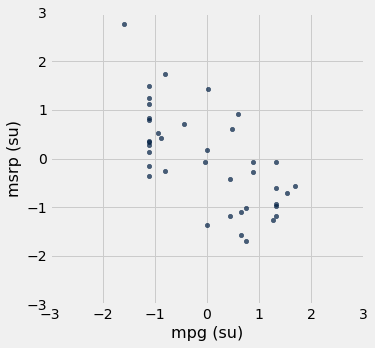

In [26]:
standardize(suv.select('mpg','msrp')).scatter(0,1)
plt.ylim([-3,3])
plt.xlim([-3,3])

(-3, 3)

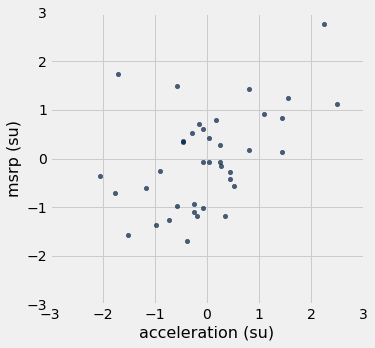

In [27]:
standardize(suv.select('acceleration','msrp')).scatter(0,1)
plt.ylim([-3,3])
plt.xlim([-3,3])

# basic idea: now we can actually compare axes
# (the plots don't actually look that different)
# a point at (1,1) is both 1 std away from the average msrp, 
# and 1 std away from the average acceleration

In [28]:
# back to slides

In [29]:
# Correlation Coefficient, r
def r_scatter(r):
    plt.figure(figsize=(5,5))
    x = np.random.normal(0, 1, 1000)
    z = np.random.normal(0, 1, 1000)
    y = r*x + (np.sqrt(1-r**2))*z
    plt.scatter(x,y)
    plt.xlim(-4,4)
    plt.ylim(-4,4)
    plt.show()

In [30]:
from ipywidgets import interact
import ipywidgets as widgets
_ = interact(r_scatter, r=(-1,1,0.1))

interactive(children=(FloatSlider(value=0.0, description='r', max=1.0, min=-1.0), Output()), _dom_classes=('wi…

In [31]:
x = make_array(1,2,3,4,5,6)
y = make_array(2,3,1,5,2,7)
t = Table().with_columns('x',x,'y',y)
t

x,y
1,2
2,3
3,1
4,5
5,2
6,7


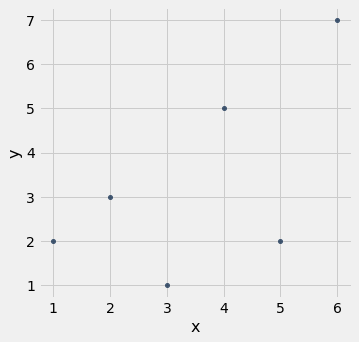

In [32]:
t.scatter(0,1)

In [33]:
# how strong is this linear relationship?

# first convert to standard units
t_standard = standardize(t)
t_standard

x (su),y (su)
-1.46385,-0.648886
-0.87831,-0.162221
-0.29277,-1.13555
0.29277,0.811107
0.87831,-0.648886
1.46385,1.78444


In [34]:
# multiply together
t_standard = t_standard.with_column('product',t_standard.column(0) * t_standard.column(1))
t_standard

x (su),y (su),product
-1.46385,-0.648886,0.949871
-0.87831,-0.162221,0.142481
-0.29277,-1.13555,0.332455
0.29277,0.811107,0.237468
0.87831,-0.648886,-0.569923
1.46385,1.78444,2.61215


In [35]:
# r is the mean of the products
r = np.mean(t_standard.column('product'))
r

# not 1 because it's not just a line,
# not 0 becaues it's not just a random cloud

0.6174163971897709

In [36]:
def correlation(t, x, y):
    t_standard = standardize(t)
    return np.mean(t_standard.column(x) * t_standard.column(y))

In [37]:
correlation(t, 0, 1)

0.6174163971897709

In [38]:
hybrid2 = Table().with_columns(
    'msrp',hybrid.column(1),
    'acceleration',hybrid.column(2),
    'mpg',hybrid.column(3)
)
for ind_1, label_1 in zip(range(3),hybrid2.labels):
    for ind_2, label_2 in zip(range(3),hybrid2.labels):
        print(label_1, label_2, correlation(hybrid2,ind_1,ind_2))

msrp msrp 1.0000000000000002
msrp acceleration 0.20978572755911537
msrp mpg 0.35942859961031226
acceleration msrp 0.20978572755911537
acceleration acceleration 0.9999999999999998
acceleration mpg 0.6955778996913978
mpg msrp 0.35942859961031226
mpg acceleration 0.6955778996913978
mpg mpg 1.0


In [39]:
# Ecological correlations can be misleading

sat2014 = Table.read_table('sat2014.csv')
sat2014.sort('State').show(3)

State,Participation Rate,Critical Reading,Math,Writing,Combined
Alabama,6.7,547,538,532,1617
Alaska,54.2,507,503,475,1485
Arizona,36.4,522,525,500,1547


In [40]:
sat2014.sort('Math',descending=True).show(5)

State,Participation Rate,Critical Reading,Math,Writing,Combined
North Dakota,2.3,612,620,584,1816
Illinois,4.6,599,616,587,1802
Iowa,3.1,605,611,578,1794
Michigan,3.8,593,610,581,1784
Minnesota,5.9,598,610,578,1786


In [41]:
sat2014.sort('Critical Reading',descending=True).show(5)

State,Participation Rate,Critical Reading,Math,Writing,Combined
North Dakota,2.3,612,620,584,1816
Iowa,3.1,605,611,578,1794
South Dakota,2.9,604,609,579,1792
Illinois,4.6,599,616,587,1802
Minnesota,5.9,598,610,578,1786


In [42]:
sat2014.sort('Writing',descending=True).show(5)

State,Participation Rate,Critical Reading,Math,Writing,Combined
Illinois,4.6,599,616,587,1802
North Dakota,2.3,612,620,584,1816
Michigan,3.8,593,610,581,1784
Missouri,4.2,595,597,579,1771
South Dakota,2.9,604,609,579,1792


In [47]:
correlation(sat2014.select(1,2,3,4,5), 'Critical Reading (su)', 'Math (su)')

0.9847558411067433

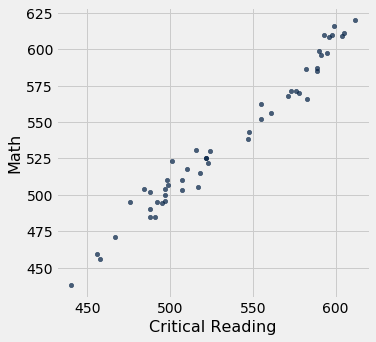

In [48]:
sat2014.scatter('Critical Reading','Math')

In [ ]:
# We can't use this to make any observations about *individuals* 
# b/c we're just looking at average

# Discussion quesiton: what made north dakota so great?

In [49]:
sat2014.sort('Math',descending=True).show(5)

State,Participation Rate,Critical Reading,Math,Writing,Combined
North Dakota,2.3,612,620,584,1816
Illinois,4.6,599,616,587,1802
Iowa,3.1,605,611,578,1794
Michigan,3.8,593,610,581,1784
Minnesota,5.9,598,610,578,1786


In [50]:
sat2014.sort('Math',descending=False).show(5)

State,Participation Rate,Critical Reading,Math,Writing,Combined
District of Columbia,100,440,438,431,1309
Idaho,100,458,456,450,1364
Delaware,100,456,459,444,1359
Maine,95.6,467,471,449,1387
Florida,72.2,491,485,472,1448


# Linear Regression

In [54]:
galton = Table.read_table('galton.csv')
heights = galton.select(3,7).relabeled(0,'MidParent').relabeled(1,'Child')
heights

MidParent,Child
75.43,73.2
75.43,69.2
75.43,69
75.43,69
73.66,73.5
73.66,72.5
73.66,65.5
73.66,65.5
72.06,71
72.06,68


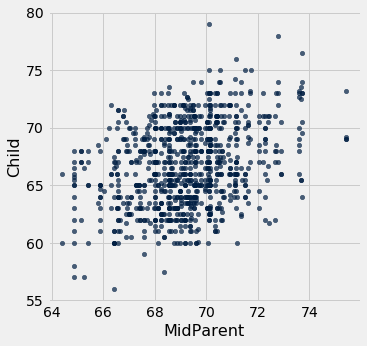

In [55]:
heights.scatter(0)

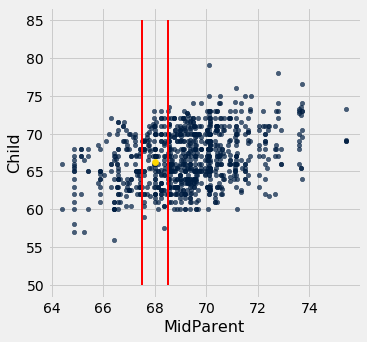

In [56]:
heights.scatter(0)
_ = plt.plot([67.5, 67.5], [50, 85], color='red', lw=2)
_ = plt.plot([68.5, 68.5], [50, 85], color='red', lw=2)
_ = plt.scatter(68, 66.24, color='gold', s=40)

In [57]:
def predict_child(parent):
    close_points = heights.where('MidParent',are.between(parent-.5, parent+.5))
    return close_points.column('Child').mean()

In [59]:
predict_child(68)

66.24045801526718

In [60]:
predict_child(74)

70.41578947368421

In [63]:
heights_and_predict = heights.with_column(
    'Prediction', heights.apply(predict_child, 'MidParent')
)

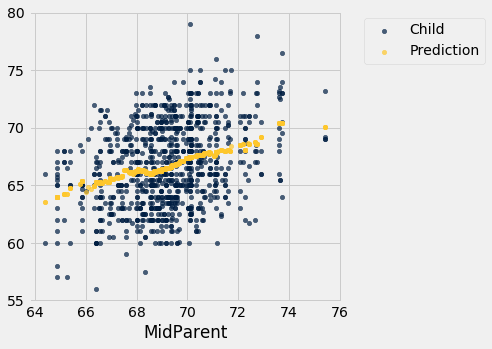

In [64]:
heights_and_predict.scatter(0)
# this was our first take at prediction

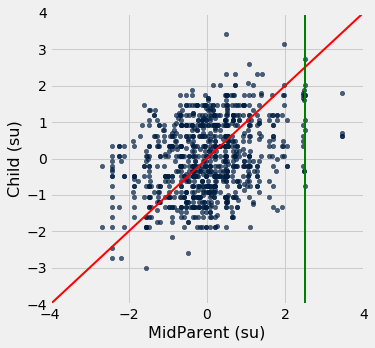

In [67]:
# how do we get a line that doesn't wobble up and down so much?
standardize(heights).scatter(0)
plt.xlim(-4,4)
plt.ylim(-4,4)
# draw a line with slope = 1
plt.plot([-4,4],[-4,4], color='r',lw=2)

# draw a line at an x-value i want to predict
plt.plot([2.5,2.5],[-4,4],color='g',lw=2)

# does the red line look like a good prediction line for this plot?
# not really! we'd expect the red line to intersect at the mean of those points

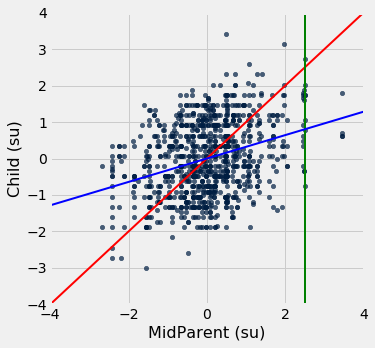

In [70]:
# how do we get a line that doesn't wobble up and down so much?
standardize(heights).scatter(0)
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.plot([-4,4],[-4,4], color='r',lw=2)
plt.plot([2.5,2.5],[-4,4],color='g',lw=2)

# draw a line with slope = r!
r = correlation(heights,0,1)
plt.plot([-4,4],[-4*r,4*r], color='b',lw=2)

# that's our linear regression line!

In [71]:
# we can use this to make predictions _in standard units_
# how do we get it back to inches?

# quickly back to slides

parent_mean = np.mean(heights.column('MidParent'))
parent_sd = np.std(heights.column('MidParent'))
child_mean = np.mean(heights.column('Child'))
child_sd = np.std(heights.column('Child'))

print(parent_mean, parent_sd)
print(child_mean, child_sd)
print(r)

69.20677301927195 1.8014050969207571
66.74593147751605 3.5773346010057634
0.32094989606395924


In [74]:
def predict_with_r(parent):
    parent_su = (parent - parent_mean) / parent_sd
    child_su = r * parent_su
    return child_su * child_sd + child_mean

In [75]:
predict_with_r(68)

65.97678154351432